Since we worked on a completely theoretical paper, we chose a dataset that present the phenomena of a non-i.i.d. data. The data is dependent due to the fact that it's from a sequence of time, therefore each sampled point is related to points that occurred shortly before or after it.

The article presents a proof of the ability to bound the data by Rademacher complexity bounds.



In [201]:
!pip install yfinance
!pip install yahoofinancials
!pip install xgboost

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [203]:
import yfinance as yf
 
sp500_data = yf.download('^GSPC', start="1980-01-01", end="2020-11-20")
sp500_data = sp500_data[['Close']]

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

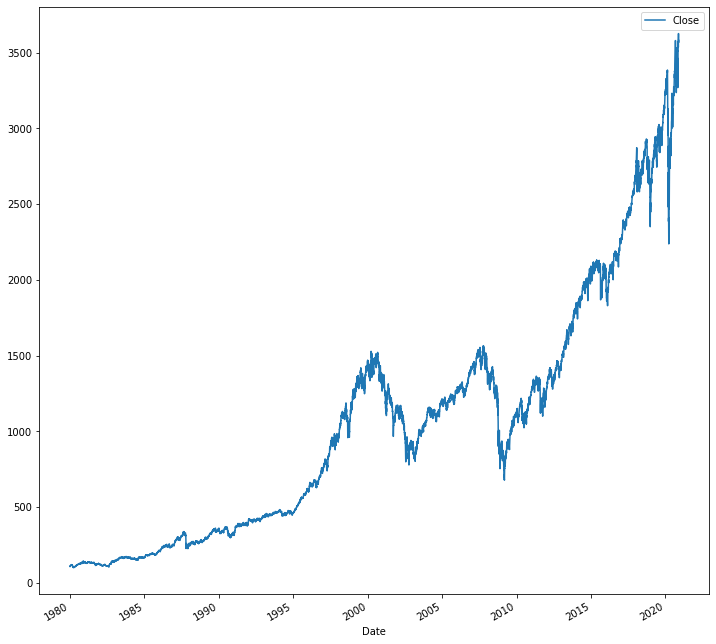

In [204]:

sp500_data.plot(figsize=(12, 12))

In [205]:
from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(sp500_data.values)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)
print("Stationary") if pval <= 0.05 else print("Non-Stationary")

ADF test statistic: 1.907400924058496
ADF p-values: 0.998539833391895
ADF number of lags used: 39
ADF number of observations: 10273
ADF critical values: {'1%': -3.4309867112571486, '5%': -2.861821389324224, '10%': -2.5669197783933826}
ADF best information criterion: 84612.05003071924
Non-Stationary


In [206]:

difs = (sp500_data.shift() - sp500_data) / sp500_data
difs = difs.dropna()
 
y = difs.Close.values

X_data = []
y_data = []
for i in range(len(y) - 31):
    X_data.append(y[i:i+30])
    y_data.append(y[i+30])

X_windows = np.vstack(X_data)

In [207]:
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(y)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)
print("Stationary") if pval <= 0.05 else print("Non-Stationary")

ADF test statistic: -17.61227147854399
ADF p-values: 3.874412857401472e-30
ADF number of lags used: 33
ADF number of observations: 10278
ADF critical values: {'1%': -3.4309864014350127, '5%': -2.8618212524155364, '10%': -2.5669197055168516}
ADF best information criterion: -62726.82094303747
Stationary


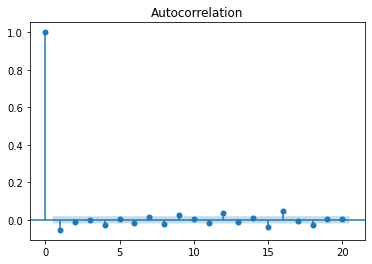

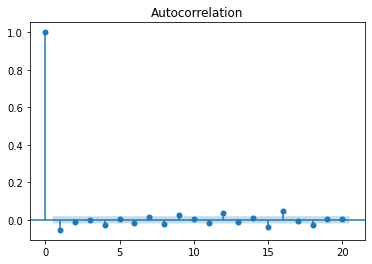

In [208]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(y, lags= 20, alpha=0.05)


In [209]:
import numpy as np
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [210]:
parameters={'max_depth': list(range(2, 20, 4)),
            'gamma': list(range(0, 10, 2)),
            'min_child_weight' : list(range(0, 10, 2)),
            'eta': [0.01,0.05, 0.1, 0.15,0.2,0.3,0.5]
    }

params= [(x, y, z, a) for x in parameters['max_depth'] for y in parameters['gamma'] for z in parameters['min_child_weight'] for a in parameters['eta']]

In [211]:

!pip install torchvision 

In [212]:

!pip install tensorflow

In [213]:
pip install numpy --upgrade

Requirement already up-to-date: numpy in c:\users\shenh\anaconda3\lib\site-packages (1.22.3)
Note: you may need to restart the kernel to use updated packages.


In [214]:
conda install pandas=0.20.3


Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed

Note: you may need to restart the kernel to use updated packages.



Examining @/win-64::__win==0=0: 100%|██████████| 4/4 [00:00<00:00,  8.31it/s]
                                                                             

Examining conflict for pandas python:   0%|          | 0/4 [00:00<?, ?it/s]
                                                                           

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - pandas=0.20.3 -> python[version='>=2.7,<2.8.0a0|>=3.5,<3.6.0a0|>=3.6,<3.7.0a0']

Your python: python=3.8

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
change your python version to a different minor version unless you explicitly specify
that.





In [215]:
model_1 = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)


In [216]:
import torch
import torchvision
import tensorflow as tf
from torch import nn
from torchvision import datasets
from torchvision import transforms
from tensorflow import keras

In [217]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [218]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim) 

        # Non-linearity
        self.sigmoid = nn.Sigmoid()

        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)  

    def forward(self, x):
        # Linear function  # LINEAR
        out = self.fc1(x)

        # Non-linearity  # NON-LINEAR
        out = self.sigmoid(out)

        # Linear function (readout)  # LINEAR
        out = self.fc2(out)
        return out

In [219]:

model_2 = xgb.XGBRegressor(n_estimators=1000, max_depth=5, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [220]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_windows, np.array(y_data), test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [222]:
model_3 = Sequential()
model_3.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model_3.add(Dropout(0.2))
model_3.add(LSTM(units=50,return_sequences=True))
model_3.add(Dropout(0.2))
model_3.add(LSTM(units=50,return_sequences=True))
model_3.add(Dropout(0.2))
model_3.add(LSTM(units=50))
model_3.add(Dropout(0.2))
model_3.add(Dense(units=1))
model_3.compile(optimizer='adam',loss='mean_squared_error')

In [223]:
!pip install localpip 


In [224]:
!conda install -c conda-forge fbprophet -y


Solving environment: ...working... done

# All requested packages already installed.



In [225]:
!pip install --upgrade plotly


Requirement already up-to-date: plotly in c:\users\shenh\anaconda3\lib\site-packages (5.6.0)


In [226]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import fbprophet
from fbprophet import Prophet

In [227]:
model_4=xgb.XGBRegressor(n_estimators=1000, max_depth=10, eta=0.2, subsample=0.7, colsample_bytree=0.8)
#model_4= Prophet()

In [228]:
model_5= xgb.XGBRegressor(n_estimators=1000, max_depth=10, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [229]:
#model_6=FullyConnected(input_size, 500, 100, num_classes)
model_6 = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [230]:
models = [model_1, model_2, model_3, model_4, model_5,model_6]


In [231]:
from sklearn.metrics import mean_squared_error

In [232]:
my_kfold = KFold(n_splits=10, shuffle=True, random_state=0)
def score_model(models):
    models_average_mse={}
    models_std_mse={}
    for model in models:
        preds=[]
        mses = []
        for train_index, test_index in my_kfold.split(X_windows):
                X_train, X_test = X_windows[train_index], X_windows[test_index]
                y_train, y_test = np.array(y_data)[train_index], np.array(y_data)[test_index]
                model.fit(X_train, y_train)
                print(model)
                #pred=model.predict(X_test)
                #preds.append(pred)
                #mses.append(mean_squared_error(y_test, preds))
 
        #average_mse = np.mean(mses)
        #std_mse = np.std(mses)
        #models_average_mse[model] = average_mse
        #models_std_mse[model] = std_mse
    
    #return models_average_mse,models_std_mse

    
        

        

In [233]:
score_model(models)
models = [model_1, model_2, model_3, model_4, model_5,model_6]

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,

In [ ]:
import yfinance as yf
sp500_data_test = yf.download('^GSPC', start="2020-11-21", end="2021-11-21")
sp500_data_test = sp500_data_test[['Close']]
difs = (sp500_data_test.shift() - sp500_data_test) / sp500_data_test
difs = difs.dropna()
y = difs.Close.values
# create windows
X_data = []
y_data = []
for i in range(len(y) - 3*31):
    X_data.append(y[i:i+3*31])
    y_data.append(y[i+3*31])
X_windows = np.vstack(X_data)
# create train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_windows, np.array(y_data), test_size=0.2, random_state=1)

array([ 0.00285925,  0.00286185,  0.00028201, ..., -0.00473441,
        0.00029256,  0.00524284], dtype=float32)

In [252]:
sp500_data_test = yf.download('^GSPC', start="2020-11-21", end="2021-11-21")
sp500_data_test = sp500_data_test[['Close']]
difs = (sp500_data_test.shift() - sp500_data_test) / sp500_data_test
difs = difs.dropna()

y = difs.Close.values

model1=model_1.predict(X_test)
model2=model_2.predict(X_test)
model3=model_3.predict(X_test)
model4=model_4.predict(X_test)
model5=model_5.predict(X_test)
model6=model_6.predict(X_test)



[*********************100%***********************]  1 of 1 completed


array([ 0.00285925,  0.00286185,  0.00028201, ..., -0.00473441,
        0.00029256,  0.00524284], dtype=float32)

In [265]:
random_coin= [random.choice([]) for x in range (len(X_test))]
print(random_coin)

[0, 0, -1, 0, 0, 0, -1, -1, -1, -1, 0, -1, 0, -1, -1, -1, -1, 0, 0, -1, 0, 0, -1, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, -1, -1, 0, -1, -1, -1, -1, 0, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, 0, 0, -1, 0, -1, 0, -1, 0, 0, 0, 0, -1, -1, 0, 0, 0, 0, -1, 0, -1, -1, -1, 0, 0, -1, 0, 0, -1, -1, -1, -1, 0, 0, -1, 0, 0, 0, -1, 0, 0, 0, -1, 0, -1, -1, -1, 0, -1, 0, -1, -1, -1, 0, -1, -1, 0, 0, 0, 0, -1, -1, -1, -1, -1, 0, -1, -1, 0, -1, 0, 0, -1, -1, -1, 0, -1, 0, -1, 0, 0, -1, 0, 0, -1, -1, 0, 0, -1, 0, 0, -1, -1, -1, -1, -1, -1, -1, 0, -1, 0, 0, 0, -1, 0, -1, -1, -1, -1, -1, -1, 0, -1, 0, -1, -1, 0, 0, 0, -1, 0, -1, -1, -1, 0, -1, 0, 0, -1, 0, -1, 0, 0, 0, 0, -1, -1, 0, -1, -1, -1, 0, -1, 0, 0, 0, 0, -1, -1, -1, 0, 0, -1, 0, -1, 0, -1, 0, 0, -1, -1, -1, 0, 0, -1, -1, 0, 0, -1, 0, 0, -1, -1, -1, -1, -1, -1, 0, -1, -1, 0, -1, 0, -1, -1, -1, 0, -1, 0, -1, 0, 0, -1, -1, 0, -1, -1, 0, 0, 0, -1, -1, -1, 0, -1, 0, -1, -1, -1, -1, 0, -1, 0, -1, -1, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, -1, 0, 

In [259]:
random_coin= [np.random.randint(-1, 1) for x in range(len(X_test))]
product1 = np.multiply(model1,random_coin)
product2 = np.multiply(model2,random_coin)
product3 = np.multiply(model3,random_coin)
product4 = np.multiply(model4,random_coin)
product5 = np.multiply(model5,random_coin)
product6 = np.multiply(model5,random_coin)
rademacher_complexity=max(np.sum(product1),np.sum(product2),np.sum(product3),np.sum(product4),np.sum(product5),np.sum(product6))/len(X_test)
print(rademacher_complexity)

0.0
